# Figure generation for *Invitation to the ECT*

This notebook was used to generate the figures for the paper 

> Elizabeth Munch. An Invitation to the Euler Characteristic Transform. [arXiv:2310.10395](https://arxiv.org/abs/2310.10395), 2023. To appear: MAA Monthly, 2024.

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
# import teaspoon 

plt.rcParams.update({
    "text.usetex": True,
    # "font.family": "Helvetica",
    "font.family": "serif",
    "font.size": 8
})

In [ ]:
import matplotlib
matplotlib.__version__

'3.8.4'

In [ ]:
# Code to set colormaps to deal with the transparency issue 

cmap_viridis = matplotlib.cm.viridis
cmap_viridis.set_bad('white',1.)


cmap_binary = matplotlib.cm.tab20b
cmap_binary.set_bad('white',1.)

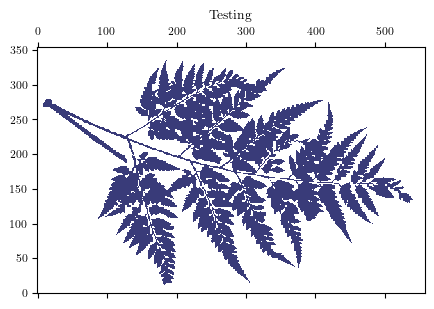

In [ ]:
F = plt.imread('figures/leafbw.tif')
F = F.T
F = F/255.

F_finite = np.copy(F)
F_finite[F==0] = 2000

# G = np.ones_like(F)
# G[F==0] = 1
# print(G.shape)

F[F==0] = np.nan


plt.matshow(F, origin = 'lower',cmap = cmap_binary)
# plt.matshow(G, origin = 'lower')

fig = plt.gcf()
# fig.set_rasterized(True)
fig.set_figwidth(5)

plt.title('Testing')

plt.savefig('figures/test.png', dpi = 300)
plt.savefig('figures/test.eps', facecolor='white', transparent=False,bbox_inches='tight')
plt.savefig('figures/test.pdf')

In [ ]:
F

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
def makeFernPic(F, theta, plot = True):
    maxRow, maxCol = np.shape(F)
    omega = (np.cos(theta), np.sin(theta))
    
    # center origin 
    Col,Row = np.meshgrid(range(maxCol),range(maxRow))
    Col = Col - np.floor(maxCol/2)
    Row = Row-np.floor(maxRow/2)
    
    fMask = omega[0]*Col + omega[1]*Row
    DT = np.multiply(F,fMask)
    
    return DT


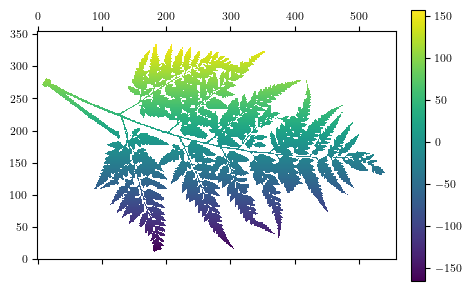

In [ ]:
cmap = matplotlib.cm.viridis
cmap.set_bad('white',1.)

plt.matshow(makeFernPic(F,np.pi/2), origin = 'lower', cmap = cmap_viridis)
plt.colorbar(fraction=0.035, pad=0.04)

fig = plt.gcf()
# fig.set_rasterized(True)
fig.set_figwidth(5)

plt.savefig('figures/test.png', dpi = 300)
plt.savefig('figures/test.eps', facecolor='white', transparent=False,bbox_inches='tight')
plt.savefig('figures/test.pdf')

# Trying Erik's stuff 


In [ ]:
import demeter.euler as euler
import demeter.directions as dirs
import demeter.misc as misc
import time
import tifffile as tf

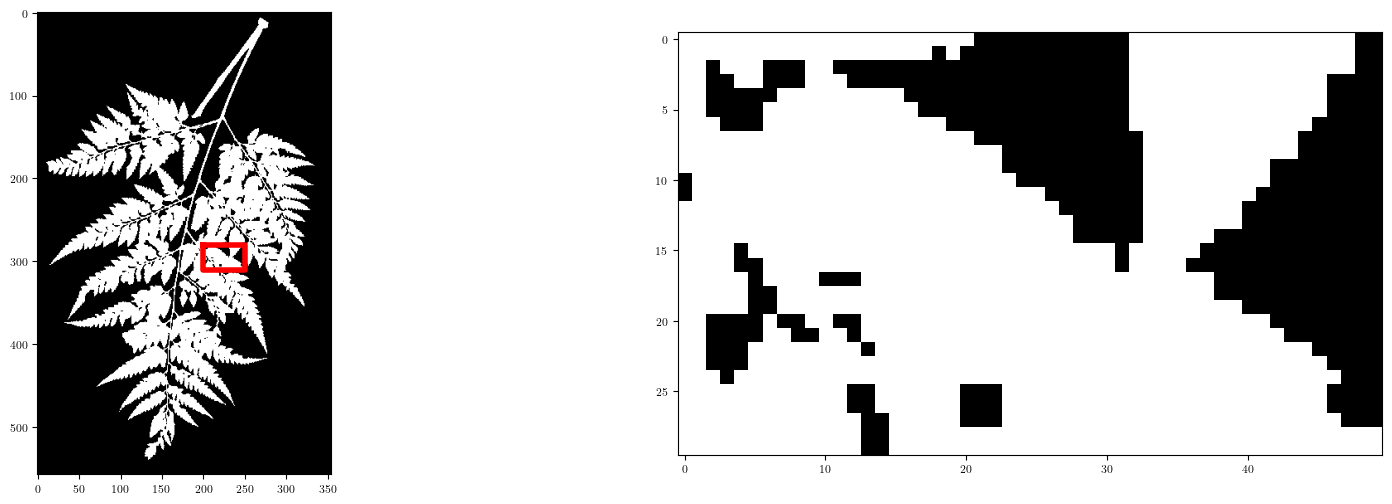

In [ ]:
leaf_file = 'figures/leafbw.tif'
leaf_img = tf.imread(leaf_file)
leaf_img[leaf_img > 0] = 1

fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].imshow(leaf_img, cmap='gray');
ax[0].plot([200,200,250,250,200], [280,310,310,280,280], c='red', lw=4);
ax[1].imshow(leaf_img[280:310, 200:250], cmap='gray');

In [ ]:
tic = time.perf_counter()
leaf = euler.CubicalComplex(leaf_img).complexify()
toc = time.perf_counter()

print("Complexify in {:.4f} seconds.\n\nCubical complex made of:".format(toc-tic))

leaf.summary();

Complexify in 1.0271 seconds.

Cubical complex made of:
53832	vertices
99196	edges
45167	squares
----
Euler Characteristic: -197


In [ ]:
leaf.summary()

53832	vertices
99196	edges
45167	squares
----
Euler Characteristic: -197


0

In [ ]:
leaf.cells

[array([[-271.57746322,   89.89517387],
        [-271.57746322,   90.89517387],
        [-270.57746322,   88.89517387],
        ...,
        [ 259.42253678,  -44.10482613],
        [ 259.42253678,  -43.10482613],
        [ 260.42253678,  -45.10482613]]),
 array([[    0,     1],
        [    0,     3],
        [    1,     4],
        ...,
        [53828, 53829],
        [53828, 53831],
        [53829, 53830]]),
 array([[    0,     1,     3,     4],
        [    2,     3,     7,     8],
        [    3,     4,     8,     9],
        ...,
        [53821, 53822, 53826, 53827],
        [53825, 53826, 53828, 53829],
        [53826, 53827, 53829, 53830]])]

In [ ]:
theta = np.pi/4
omega = (np.cos(theta),np.sin(theta))
heights = np.sum(leaf.cells[0]*omega, axis=1)


In [ ]:
heights

array([-128.46877882, -127.76167204, -128.46877882, ...,  152.25261331,
        152.9597201 ,  152.25261331])

## Making pictures

In [ ]:
theta = 6*np.pi/4
omega = (np.cos(theta), np.sin(theta))
heights = np.sum(leaf.cells[0]*omega, axis=1)


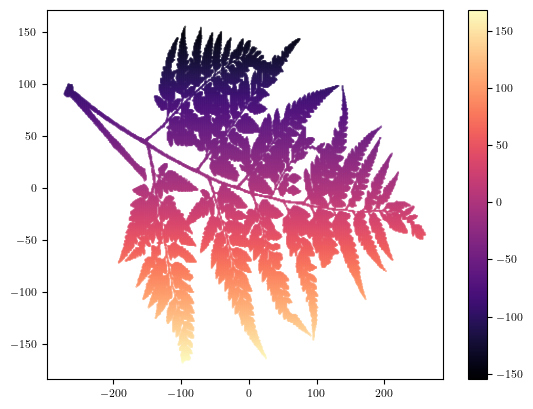

In [ ]:
plt.scatter(leaf.cells[0][:,0],leaf.cells[0][:,1],  
                         s=0.1, c=heights, cmap='magma', label='T = {}'.format(32))
plt.colorbar()

In [ ]:
# Figuring out centering 
size = np.shape(F)
print(np.floor(size[0]/2))
print(np.floor(size[1]/2))


177.0
279.0


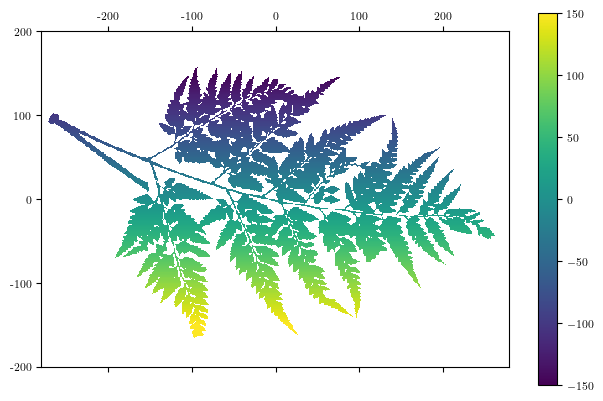

In [ ]:
plt.matshow(makeFernPic(F,theta), origin = 'lower', cmap = cmap_viridis, vmin = -150, vmax = 150)
ax = plt.gca()
midx = 279
ax.set_xticks(midx+100*np.arange(-2,3))
ax.set_xticklabels(np.arange(-2,3)*100)

midy = 177
ax.set_yticks(midy+100*np.arange(-2,3))
ax.set_yticklabels(np.arange(-2,3)*100)

plt.colorbar()

# plt.savefig('figures/Fern' + str(int(theta*1000)) + '.png', bbox_inches = 'tight')

0.7853981633974483
[1.8 4.8]
1.8


2.356194490192345
[1.8 4.8]
1.8
4.71238898038469
[1.8 4.8]
1.8
5.497787143782138
[1.8 4.8]
1.8


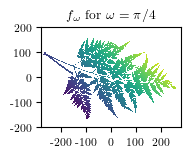

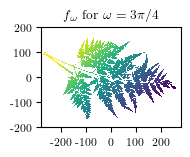

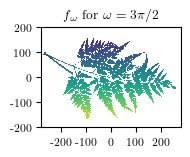

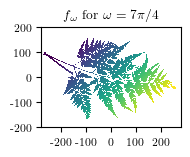

In [ ]:
# Version without colorbars 

thetaStrs = [r'\pi/4', r'3\pi/4', r'3\pi/2', '7\pi/4']
thetaStrsFile = [r'pi_over_4', r'3pi_over_4', r'3pi_over_2', '7pi_over_4']
thetas = [np.pi/4, 3*np.pi/4, 3*np.pi/2, 7*np.pi/4]


for i, theta in enumerate(thetas):
    print(theta)
    im = plt.matshow(makeFernPic(F,theta), origin = 'lower', cmap = cmap_viridis, vmin = -200, vmax = 200)
    ax = plt.gca()
    midx = 279
    ax.set_xticks(midx+100*np.arange(-2,3))
    ax.set_xticklabels(np.arange(-2,3)*100)
    ax.xaxis.set_ticks_position('bottom')

    midy = 177
    ax.set_yticks(midy+100*np.arange(-2,3))
    ax.set_yticklabels(np.arange(-2,3)*100)

    # plt.colorbar(fraction=0.035, pad=0.04)
    plt.title(r'$f_{\omega}$ for $\omega = ' + thetaStrs[i] + r'$')
    fig = plt.gcf()
    fig.set_figwidth(1.8)

    print(fig.get_size_inches())
    height_fig = fig.get_size_inches()[0]
    print(height_fig)

    plt.savefig('figures/Fern_' + thetaStrsFile[i] + '_nocolorbar.png', bbox_inches = 'tight', dpi = 300)
    plt.savefig('figures/Fern_' + thetaStrsFile[i] + '_nocolorbar.eps', bbox_inches = 'tight')

0.7853981633974483
1.8
[7.54478873 1.8       ]
2.356194490192345
1.8
[7.54478873 1.8       ]
4.71238898038469
1.8
[7.54478873 1.8       ]
5.497787143782138
1.8
[7.54478873 1.8       ]


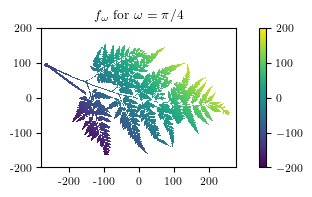

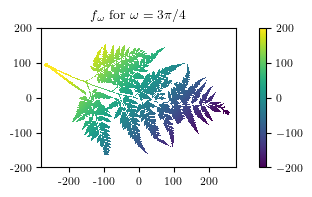

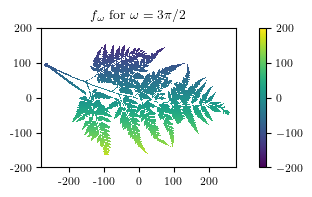

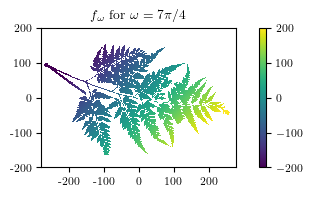

In [ ]:


thetaStrs = [r'\pi/4', r'3\pi/4', r'3\pi/2', '7\pi/4']
thetaStrsFile = [r'pi_over_4', r'3pi_over_4', r'3pi_over_2', '7pi_over_4']
thetas = [np.pi/4, 3*np.pi/4, 3*np.pi/2, 7*np.pi/4]


for i, theta in enumerate(thetas):
    print(theta)
    plt.matshow(makeFernPic(F,theta), origin = 'lower', cmap = cmap_viridis, vmin = -200, vmax = 200)
    ax = plt.gca()
    midx = 279
    ax.set_xticks(midx+100*np.arange(-2,3))
    ax.set_xticklabels(np.arange(-2,3)*100)
    ax.xaxis.set_ticks_position('bottom')

    midy = 177
    ax.set_yticks(midy+100*np.arange(-2,3))
    ax.set_yticklabels(np.arange(-2,3)*100)

    plt.colorbar(fraction=0.03, pad=0.04)
    plt.title(r'$f_{\omega}$ for $\omega = ' + thetaStrs[i] + r'$')
    fig = plt.gcf()
    # fig.set_figwidth(2.4)
    print(height_fig)
    fig.set_figheight(height_fig)

    print(fig.get_size_inches())

    plt.savefig('figures/Fern_' + thetaStrsFile[i] + '.png', bbox_inches = 'tight', dpi = 300)
    plt.savefig('figures/Fern_' + thetaStrsFile[i] + '.eps', bbox_inches = 'tight')

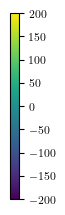

In [ ]:
fig,ax = plt.subplots()
plt.colorbar(im,ax=ax)

ax.remove()
fig.set_figwidth(0.8)
plt.savefig('figures/OnlyColorbar.png', bbox_inches = 'tight', dpi = 300)
plt.savefig('figures/OnlyColorbar.eps', bbox_inches = 'tight')

In [ ]:
str(int(theta*1000))

'5497'

## Thresholded Figure 

In [ ]:
def makeFernPicThreshold(F, theta, thresh, both = False):
    maxRow, maxCol = np.shape(F)
    omega = (np.cos(theta), np.sin(theta))
    
    # center origin 
    Col,Row = np.meshgrid(range(maxCol),range(maxRow))
    Col = Col - np.floor(maxCol/2)
    Row = Row-np.floor(maxRow/2)
    
    fMask = omega[0]*Col + omega[1]*Row
    
    fMaskBelow = fMask.copy()
    fMaskBelow[fMaskBelow <= thresh] = np.nan
    
    fMaskAbove = fMask.copy()
    fMaskAbove[fMaskAbove > thresh] = np.nan
    
    
    DTdown = np.multiply(F,fMaskAbove)
    DTup = np.multiply(F,fMaskBelow)
    
    # Why the fork is this backwards!?!?!?!?!
    # Must have something to do with meshgrid but i just can't fight it right now
    if both:
    
        return DTdown,DTup
    else:
        return DTdown


[1.25 4.8 ]


[1.25 4.8 ]
[1.25 4.8 ]
[1.25 4.8 ]
[1.25 4.8 ]
[1.25 4.8 ]
[1.25 4.8 ]


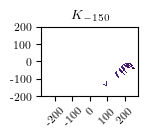

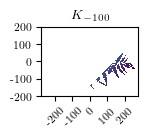

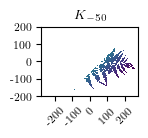

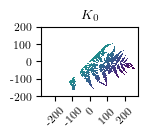

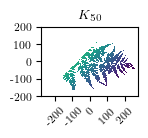

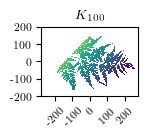

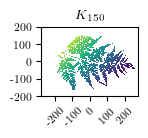

In [ ]:
theta = 3*np.pi/4

for thresh in [-150,-100,-50,0,50,100,150]:


    heights = np.sum(leaf.cells[0]*omega, axis=1)

    # Plot colors above theshold
    plt.matshow(makeFernPicThreshold(F,theta,thresh), 
                origin = 'lower', 
                cmap = cmap_viridis, 
                vmin = -200, vmax = 200)

    ax = plt.gca()
    midx = 279
    ax.set_xticks(midx+100*np.arange(-2,3))
    ax.set_xticklabels(np.arange(-2,3)*100)
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis='x', labelrotation=45)


    midy = 177
    ax.set_yticks(midy+100*np.arange(-2,3))
    ax.set_yticklabels(np.arange(-2,3)*100)
    
    plt.title(r'$K_{' + str(thresh) + r'}$')

    fig = plt.gcf()
    fig.set_figwidth(1.25)

    thresh_size_fig = fig.get_size_inches()
    print(thresh_size_fig)

    # plt.colorbar()

    plt.savefig('figures/Fern_3pi_over_4_Thresh'+str(thresh)+'.png', bbox_inches = 'tight',dpi = 300)
    plt.savefig('figures/Fern_3pi_over_4_Thresh'+str(thresh)+'.eps', bbox_inches = 'tight')

    # plt.clf()

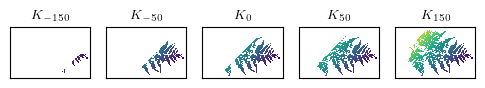

In [ ]:
theta = 3*np.pi/4

fig,axes = plt.subplots(1,5,sharey = True, figsize = (6,2))

for i, thresh in enumerate([-150,-50,0,50,150]):

    ax = axes[i]

    heights = np.sum(leaf.cells[0]*omega, axis=1)

    # Plot colors above theshold
    ax.matshow(makeFernPicThreshold(F,theta,thresh), 
                origin = 'lower', 
                cmap = cmap_viridis, 
                vmin = -200, vmax = 200)

    # midx = 279
    # ax.set_xticks(midx+100*np.arange(-2,3))
    # ax.set_xticklabels(np.arange(-2,3)*100)
    # ax.xaxis.set_ticks_position('bottom')
    # ax.tick_params(axis='x', labelrotation=45)


    # midy = 177
    # ax.set_yticks(midy+100*np.arange(-2,3))
    # ax.set_yticklabels(np.arange(-2,3)*100)

    ax.set_xticks([])   
    ax.set_yticks([]) 
    ax.set_title(r'$K_{' + str(thresh) + r'}$')

    # fig = plt.gcf()
    # fig.set_figwidth(1.25)

    # thresh_size_fig = fig.get_size_inches()
    # print(thresh_size_fig)

    # plt.colorbar()

    # plt.savefig('figures/Fern_3pi_over_4_Thresh'+str(thresh)+'.png', bbox_inches = 'tight',dpi = 300)
    # plt.savefig('figures/Fern_3pi_over_4_Thresh'+str(thresh)+'.eps', bbox_inches = 'tight')

    # plt.clf()
plt.savefig('figures/Fern_3pi_over_4_AllThresh.png', bbox_inches = 'tight',dpi = 300)
plt.savefig('figures/Fern_3pi_over_4_AllThresh.eps', bbox_inches = 'tight',dpi = 300)

## ECC in one direction

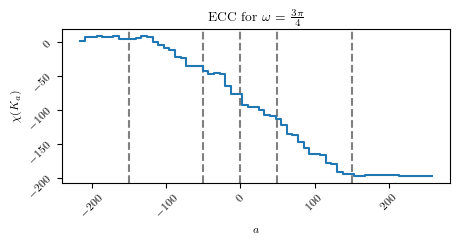

In [ ]:
theta = 3*np.pi/4
omega = (np.cos(theta), np.sin(theta))
heights = np.sum(leaf.cells[0]*omega, axis=1)
numThresh = 64

threshes= np.linspace(heights.min(), heights.max(), numThresh)

outECC = leaf.ECC(heights, numThresh)

fig = plt.figure()
ax = plt.gca()

positions = [-150, -50, 0, 50, 150]
for pos in positions:
    ax.axvline(x=pos, color='grey', linestyle='--')



plt.step(threshes,outECC)
plt.title(r'ECC for $\omega = \frac{3 \pi}{4}$')
plt.xlabel('$a$')
plt.ylabel(r'$\chi(K_a)$')

# ax.set_xticks([-200,-150,-100,-50,0,50,100,150,200])
    # midx = 279
    # ax.set_xticks(midx+100*np.arange(-2,3))
    # ax.set_xticklabels(np.arange(-2,3)*100)
    # ax.xaxis.set_ticks_position('bottom')
    # ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=45)







fig = plt.gcf()
fig.set_size_inches(5,2)
# fig.set_size_inches(thresh_size_fig)
# print(thresh_size_fig)
# print(fig.get_size_inches())

plt.savefig('figures/Fern_3pi_over_4_ECC.png', bbox_inches = 'tight',dpi=300)
plt.savefig('figures/Fern_3pi_over_4_ECC.eps', bbox_inches = 'tight')

In [ ]:
print(outECC[-1])

-197


## ECT


In [ ]:
# Get all the directions around the circle
numCircleDirs = 32
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)
circledirs

print(circledirs/np.pi)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
 1.875  1.9375]


In [ ]:
# Choose number of thresholds for the ECC to stop at 
numThresh = 100 

In [ ]:
ECT_preprocess = {}

overallmin = 0
overallmax = 0

for i, omega in enumerate(circledirs):
    
    omegavec = np.array((np.cos(omega),np.sin(omega)))
    
    # Function values of all the pixels
    heights = np.sum(leaf.cells[0]*omegavec, axis=1)

    # Thresholds implicitly calculated by Erik's code
    threshes= np.linspace(heights.min(), heights.max(), numThresh)
    
    if heights.min()<overallmin:
        overallmin = heights.min()
    if heights.max()>overallmax:
        overallmax= heights.max()
            

    outECC = leaf.ECC(heights, numThresh)
    
    ECT_preprocess[i] = (threshes,outECC)
    
print(overallmin,overallmax)

-285.68893688291087 285.68893688291087


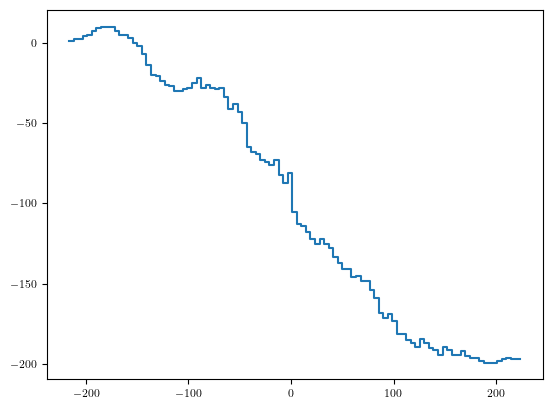

In [ ]:
i = 2

plt.step( ECT_preprocess[i][0],  ECT_preprocess[i][1])

In [ ]:
# Making a matrix of size numThreshes x numCircleDirs
# M[i,j] = 


# Make meshgrid. The +1 is to draw 2pi on both ends
X,Y = np.meshgrid(range(numCircleDirs+1),np.linspace(-250,250,numThresh))
M = np.ones_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        omegai = X[i,j]
        
        # Deal with redrawing the 2pi
        omegai = np.mod(omegai,numCircleDirs)
        
        
        omega = i*np.pi/numCircleDirs
        a = Y[i,j]
        threshes = ECT_preprocess[omegai][0]
#         print(threshes)
        try: 
            index = np.where(threshes>=a)[0][0]   
        except:
            index = [-1]

        M[i,j] = ECT_preprocess[omegai][1][index]

/tmp/ipykernel_57600/1470381530.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  M[i,j] = ECT_preprocess[omegai][1][index]


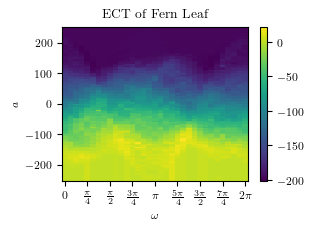

In [ ]:
plt.pcolormesh(X,Y,M, cmap = 'viridis')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))

labels = [r'$0$',
          r'$\frac{\pi}{4}$',
          r'$\frac{\pi}{2}$',
          r'$\frac{3\pi}{4}$',
          r'$\pi$',
          r'$\frac{5\pi}{4}$',
          r'$\frac{3\pi}{2}$',
          r'$\frac{7\pi}{4}$',
          r'$2\pi$',
         ]

ax.set_xticklabels(labels)


plt.xlabel(r'$\omega$')
plt.ylabel(r'$a$')

plt.title(r'ECT of Fern Leaf')
fig = plt.gcf()
fig.set_size_inches(3,2)

plt.savefig('figures/Fern_ECT.png', bbox_inches = 'tight',dpi=900)
plt.savefig('figures/Fern_ECT.eps', bbox_inches = 'tight')

In [ ]:
M[0,:]

array([ 1,  1,  1,  1,  6,  1,  1,  1,  1,  2,  1,  4,  1,  1,  3,  3,  2,
        1,  2, 10,  3,  3,  1,  1,  3,  3,  1,  2,  1,  1,  1,  1,  1])

In [ ]:
bigvals = np.where(M[0,:] >3)[0]


circledirs[bigvals]/np.pi*16

array([ 4., 11., 19.])

## Let's draw a cylinder!

In [ ]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# pip install ipympl

# %matplotlib widget

In [ ]:
grid = M[:,:-1]
print(grid.shape)

(100, 32)


In [ ]:
color_dimension = grid # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

print(fcolors.shape)

(100, 32, 4)


In [ ]:
theta = np.linspace(0, 2 * np.pi, 24)
print(theta)
# theta = circledirs[:-1]
# print(theta, theta.shape)


[0.         0.27318197 0.54636394 0.81954591 1.09272788 1.36590985
 1.63909182 1.91227379 2.18545576 2.45863773 2.7318197  3.00500167
 3.27818364 3.55136561 3.82454758 4.09772955 4.37091152 4.64409349
 4.91727546 5.19045743 5.4636394  5.73682137 6.01000334 6.28318531]


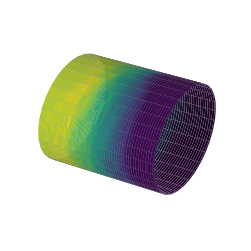

In [ ]:
"""
equation for a circle

x  =  h + r cosθ
y  =  k + r sinθ

where h and k are the co-ordinates of the center

0 <= θ <= 360
"""

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111, projection='3d')

# theta = np.linspace(0, 2 * np.pi, 24)
radius = 1


x = np.linspace(0, numThresh, numThresh)

# theta = circledirs
theta = np.linspace(0, 2 * np.pi, 32)

thetas, xs = np.meshgrid(theta, x)

y = radius * np.cos(thetas)
z = radius * np.sin(thetas)

#ax.plot_surface(xs, y, z, color='orange')
#ax.plot_surface(xs, y, z, facecolors=fcolors)
surf = ax.plot_surface(xs, y, z, facecolors = fcolors,linewidth = 0.1)
surf.set_edgecolor('grey')

ax.set_axis_off()

plt.savefig('figures/fern_ECT_cylinder.png', bbox_inches = 'tight',dpi = 900)
plt.savefig('figures/fern_ECT_cylinder.eps', bbox_inches = 'tight')

In [ ]:
omegai = 5
omega = i*np.pi/numCircleDirs
a = 17
threshes = ECT_preprocess[omegai][0]
print(threshes)

index = np.where(threshes>=a)[0][0]
print(index)
print(threshes[index])
ECT_preprocess[omegai][1][index]

[-193.98518858 -190.40235323 -186.81951788 -183.23668253 -179.65384718
 -176.07101183 -172.48817648 -168.90534113 -165.32250578 -161.73967042
 -158.15683507 -154.57399972 -150.99116437 -147.40832902 -143.82549367
 -140.24265832 -136.65982297 -133.07698762 -129.49415227 -125.91131692
 -122.32848157 -118.74564621 -115.16281086 -111.57997551 -107.99714016
 -104.41430481 -100.83146946  -97.24863411  -93.66579876  -90.08296341
  -86.50012806  -82.91729271  -79.33445735  -75.751622    -72.16878665
  -68.5859513   -65.00311595  -61.4202806   -57.83744525  -54.2546099
  -50.67177455  -47.0889392   -43.50610385  -39.92326849  -36.34043314
  -32.75759779  -29.17476244  -25.59192709  -22.00909174  -18.42625639
  -14.84342104  -11.26058569   -7.67775034   -4.09491499   -0.51207963
    3.07075572    6.65359107   10.23642642   13.81926177   17.40209712
   20.98493247   24.56776782   28.15060317   31.73343852   35.31627387
   38.89910923   42.48194458   46.06477993   49.64761528   53.23045063
   56.8

-83

## Erik's version

In [ ]:
# t = 32
# tic = time.perf_counter()
# ect = leaf.ECT(circle_dirs, T=t)
# toc = time.perf_counter()
# print("Complex with {} vertices\n".format(len(leaf.cells[0])))
# print("ECT with {} directions in {:.4f} seconds.\n{:.4f}s per direction".format(len(circle_dirs), toc-tic, (toc-tic)/len(circle_dirs)))

# plt.figure(figsize=(15,2))
# plt.plot(ect);
# plt.title('ECT for {} directions and {} thresholds each'.format(len(circle_dirs),t), fontsize=24);

# SECT

Text(0.5, 1.0, 'ECT of Fern Leaf')

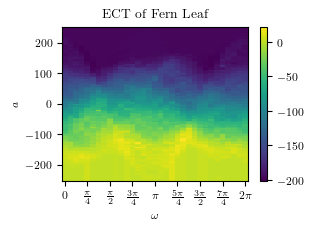

In [ ]:
# THe original ECT

plt.pcolormesh(X,Y,M, cmap = 'viridis')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))

labels = [r'$0$',
          r'$\frac{\pi}{4}$',
          r'$\frac{\pi}{2}$',
          r'$\frac{3\pi}{4}$',
          r'$\pi$',
          r'$\frac{5\pi}{4}$',
          r'$\frac{3\pi}{2}$',
          r'$\frac{7\pi}{4}$',
          r'$2\pi$',
         ]

ax.set_xticklabels(labels)

fig = plt.gcf()
fig.set_size_inches(3,2)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$a$')

plt.title(r'ECT of Fern Leaf')

In [ ]:
# Following Crawford2019 for the moment. Is this different in the Meng22 version?
print(M.shape)

# Averages for a fixed direction 
AvgOverOmega = np.average(M,axis = 0)
print(AvgOverOmega)

# Mean centered 

Mcentered = M-AvgOverOmega

(100, 33)
[-100.72  -99.01  -96.97  -95.    -93.24  -92.33  -91.34  -90.83  -90.69
  -89.07  -87.98  -87.07  -87.2   -87.64  -88.43  -89.47  -90.97  -90.94
  -91.8   -91.22  -93.    -94.51  -96.85  -98.61  -99.98 -100.05 -100.44
 -100.47 -101.04 -101.12 -101.03 -100.91 -100.72]


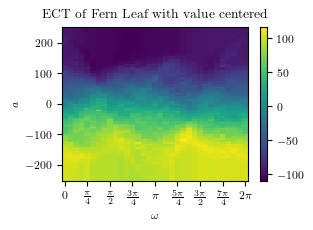

In [ ]:
plt.pcolormesh(X,Y,Mcentered, cmap = 'viridis')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))

labels = [r'$0$',
          r'$\frac{\pi}{4}$',
          r'$\frac{\pi}{2}$',
          r'$\frac{3\pi}{4}$',
          r'$\pi$',
          r'$\frac{5\pi}{4}$',
          r'$\frac{3\pi}{2}$',
          r'$\frac{7\pi}{4}$',
          r'$2\pi$',
         ]

ax.set_xticklabels(labels)


plt.xlabel(r'$\omega$')
plt.ylabel(r'$a$')

plt.title(r'ECT of Fern Leaf with value centered')

fig = plt.gcf()
fig.set_size_inches(3,2)

plt.savefig('figures/Fern-ECT-centered.png', bbox_inches = 'tight')

In [ ]:
Mcentered.sum(axis = 0)

array([-1.09992015e-11,  1.23066002e-11, -1.07718279e-11,  0.00000000e+00,
       -1.27613475e-11, -5.48538992e-12,  6.96331881e-12, -5.03064257e-12,
        4.71800377e-12,  7.78754838e-12,  1.33582034e-12,  7.78754838e-12,
       -9.12336873e-12, -5.42854650e-12, -7.56017471e-12, -1.09992015e-11,
       -1.09992015e-11,  4.71800377e-12,  9.35074240e-12, -1.09992015e-11,
        0.00000000e+00,  1.25339739e-11, -6.56541488e-12,  5.54223334e-12,
        1.33582034e-12,  9.40758582e-12,  4.66116035e-12, -1.09992015e-11,
       -2.87059265e-12, -8.29913915e-12,  1.07718279e-11, -7.53175300e-12,
       -1.09992015e-11])

In [ ]:
a = np.array([[1,2,3], [4,5,6]])
print(a)
np.cumsum(a,axis = 0)

[[1 2 3]
 [4 5 6]]


array([[1, 2, 3],
       [5, 7, 9]])

In [ ]:
Mint = np.cumsum(Mcentered,axis = 0)

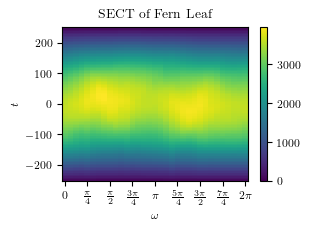

In [ ]:
plt.pcolormesh(X,Y,Mint, cmap = 'viridis')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,numCircleDirs+1,4))

labels = [r'$0$',
          r'$\frac{\pi}{4}$',
          r'$\frac{\pi}{2}$',
          r'$\frac{3\pi}{4}$',
          r'$\pi$',
          r'$\frac{5\pi}{4}$',
          r'$\frac{3\pi}{2}$',
          r'$\frac{7\pi}{4}$',
          r'$2\pi$',
         ]

ax.set_xticklabels(labels)


fig = plt.gcf()
fig.set_size_inches(3,2)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$t$')

plt.title(r'SECT of Fern Leaf')

plt.savefig('figures/Fern-SECT.png',bbox_inches = 'tight',dpi=900)
plt.savefig('figures/Fern-SECT.eps',bbox_inches = 'tight')